## व्यंजन वर्गीकरणकर्ता 1

इस पाठ में, हम विभिन्न प्रकार के वर्गीकरणकर्ताओं का अन्वेषण करेंगे ताकि *सामग्री के एक समूह के आधार पर किसी दिए गए राष्ट्रीय व्यंजन की भविष्यवाणी की जा सके।* ऐसा करते समय, हम यह भी जानेंगे कि वर्गीकरण कार्यों के लिए एल्गोरिदम का उपयोग कैसे किया जा सकता है।

### [**पाठ-पूर्व प्रश्नोत्तरी**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **तैयारी**

यह पाठ हमारे [पिछले पाठ](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) पर आधारित है, जहाँ हमने:

-   एशिया और भारत के सभी शानदार व्यंजनों के डेटा सेट का उपयोग करके वर्गीकरण का एक सरल परिचय दिया था। 😋

-   डेटा को तैयार और साफ करने के लिए कुछ [dplyr क्रियाओं](https://dplyr.tidyverse.org/) का अन्वेषण किया था।

-   ggplot2 का उपयोग करके सुंदर विज़ुअलाइज़ेशन बनाए थे।

-   असंतुलित डेटा को [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) का उपयोग करके पूर्व-प्रसंस्करण करके कैसे संभालें, यह प्रदर्शित किया था।

-   यह सुनिश्चित करने के लिए कि हमारी रेसिपी अपेक्षित रूप से काम करेगी, उसे `prep` और `bake` करना प्रदर्शित किया था।

#### **पूर्वापेक्षा**

इस पाठ के लिए, हमें डेटा को साफ, तैयार और विज़ुअलाइज़ करने के लिए निम्नलिखित पैकेजों की आवश्यकता होगी:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) [R पैकेजों का संग्रह](https://www.tidyverse.org/packages) है, जिसे डेटा साइंस को तेज़, आसान और मज़ेदार बनाने के लिए डिज़ाइन किया गया है!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) ढांचा [पैकेजों का संग्रह](https://www.tidymodels.org/packages/) है, जो मॉडलिंग और मशीन लर्निंग के लिए उपयोगी है।

-   `themis`: [themis पैकेज](https://themis.tidymodels.org/) असंतुलित डेटा को संभालने के लिए अतिरिक्त रेसिपी चरण प्रदान करता है।

-   `nnet`: [nnet पैकेज](https://cran.r-project.org/web/packages/nnet/nnet.pdf) एकल छिपी हुई परत वाले फीड-फॉरवर्ड न्यूरल नेटवर्क और बहु-नामक लॉजिस्टिक रिग्रेशन मॉडल का अनुमान लगाने के लिए कार्य प्रदान करता है।

आप इन्हें इस प्रकार इंस्टॉल कर सकते हैं:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

वैकल्पिक रूप से, नीचे दिया गया स्क्रिप्ट यह जांचता है कि इस मॉड्यूल को पूरा करने के लिए आवश्यक पैकेज आपके पास हैं या नहीं, और यदि वे गायब हैं तो उन्हें आपके लिए इंस्टॉल कर देता है।


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



अब, चलिए काम शुरू करते हैं!

## 1. डेटा को प्रशिक्षण और परीक्षण सेट में विभाजित करें।

हम अपनी पिछली कक्षा के कुछ चरणों को चुनकर शुरुआत करेंगे।

### `dplyr::select()` का उपयोग करके उन सबसे सामान्य सामग्रियों को हटा दें, जो अलग-अलग व्यंजनों के बीच भ्रम पैदा करती हैं।

हर किसी को चावल, लहसुन और अदरक पसंद है!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


cuisine,n
<fct>,<int>
korean,799
indian,598
chinese,442
japanese,320
thai,289


बढ़िया! अब, डेटा को इस तरह विभाजित करने का समय है कि 70% डेटा प्रशिक्षण के लिए जाए और 30% परीक्षण के लिए। हम डेटा विभाजित करते समय `स्तरीकरण` तकनीक का भी उपयोग करेंगे ताकि `प्रत्येक व्यंजन की समानुपातिकता` प्रशिक्षण और सत्यापन डेटासेट्स में बनी रहे।

[rsample](https://rsample.tidymodels.org/), जो कि Tidymodels का एक पैकेज है, डेटा विभाजन और पुनःनमूना लेने के लिए एक प्रभावी ढांचा प्रदान करता है:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


cuisine,n
<fct>,<int>
korean,559
indian,418
chinese,309
japanese,224
thai,202


## 2. असंतुलित डेटा से निपटना

जैसा कि आपने मूल डेटा सेट और हमारे प्रशिक्षण सेट में देखा होगा, व्यंजनों की संख्या में काफी असमान वितरण है। कोरियाई व्यंजन *लगभग* थाई व्यंजनों से 3 गुना अधिक हैं। असंतुलित डेटा का मॉडल के प्रदर्शन पर अक्सर नकारात्मक प्रभाव पड़ता है। कई मॉडल तब सबसे अच्छा प्रदर्शन करते हैं जब अवलोकनों की संख्या समान होती है, और इसलिए, असंतुलित डेटा के साथ संघर्ष करते हैं।

असंतुलित डेटा सेट से निपटने के दो मुख्य तरीके हैं:

-   अल्पसंख्यक वर्ग में अवलोकन जोड़ना: `Over-sampling`, जैसे SMOTE एल्गोरिदम का उपयोग करना, जो इन मामलों के निकटतम पड़ोसियों का उपयोग करके अल्पसंख्यक वर्ग के नए उदाहरण कृत्रिम रूप से उत्पन्न करता है।

-   बहुसंख्यक वर्ग से अवलोकन हटाना: `Under-sampling`

हमने अपने पिछले पाठ में दिखाया था कि `recipe` का उपयोग करके असंतुलित डेटा सेट से कैसे निपटा जा सकता है। एक recipe को एक खाका माना जा सकता है जो यह वर्णन करता है कि डेटा सेट को डेटा विश्लेषण के लिए तैयार करने के लिए किन चरणों को लागू किया जाना चाहिए। हमारे मामले में, हम अपने `training set` में व्यंजनों की संख्या में समान वितरण चाहते हैं। चलिए इसे शुरू करते हैं।


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

आप निश्चित रूप से इस रेसिपी को जांच सकते हैं (prep+bake का उपयोग करके) ताकि यह सुनिश्चित हो सके कि यह आपकी अपेक्षा के अनुसार काम करेगी - सभी व्यंजन लेबल्स में `559` ऑब्ज़र्वेशन हैं।

चूंकि हम इस रेसिपी का उपयोग मॉडलिंग के लिए एक प्रीप्रोसेसर के रूप में करेंगे, एक `workflow()` हमारे लिए सारा prep और bake कर देगा, इसलिए हमें रेसिपी को मैन्युअली अनुमानित करने की आवश्यकता नहीं होगी।

अब हम एक मॉडल को ट्रेन करने के लिए तैयार हैं 👩‍💻👨‍💻!

## 3. अपने क्लासिफायर का चयन करना

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>आर्टवर्क: @allison_horst</figcaption>


अब हमें तय करना है कि इस काम के लिए कौन सा एल्गोरिदम इस्तेमाल करना है 🤔।

Tidymodels में, [`parsnip package`](https://parsnip.tidymodels.org/index.html) विभिन्न इंजन (पैकेज) के साथ मॉडल पर काम करने के लिए एक सुसंगत इंटरफ़ेस प्रदान करता है। कृपया [मॉडल प्रकार और इंजन](https://www.tidymodels.org/find/parsnip/#models) और उनके संबंधित [मॉडल तर्क](https://www.tidymodels.org/find/parsnip/#model-args) को एक्सप्लोर करने के लिए parsnip दस्तावेज़ देखें। पहली नज़र में विविधता काफी चौंकाने वाली लगती है। उदाहरण के लिए, निम्नलिखित विधियां सभी वर्गीकरण तकनीकों को शामिल करती हैं:

-   C5.0 नियम-आधारित वर्गीकरण मॉडल

-   लचीले भेदभाव मॉडल

-   रैखिक भेदभाव मॉडल

-   नियमित भेदभाव मॉडल

-   लॉजिस्टिक रिग्रेशन मॉडल

-   बहु-नामांकित रिग्रेशन मॉडल

-   नाइव बेयस मॉडल

-   सपोर्ट वेक्टर मशीन

-   निकटतम पड़ोसी

-   निर्णय वृक्ष

-   समुच्चय विधियां

-   न्यूरल नेटवर्क

सूची जारी रहती है!

### **कौन सा वर्गीकरणकर्ता चुनें?**

तो, आपको कौन सा वर्गीकरणकर्ता चुनना चाहिए? अक्सर, कई विकल्पों को आजमाना और अच्छे परिणाम की तलाश करना एक तरीका है।

> AutoML इस समस्या को आसानी से हल करता है, इन तुलनाओं को क्लाउड में चलाकर, जिससे आप अपने डेटा के लिए सबसे अच्छा एल्गोरिदम चुन सकते हैं। इसे [यहां](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott) आज़माएं।

साथ ही, वर्गीकरणकर्ता का चयन हमारी समस्या पर निर्भर करता है। उदाहरण के लिए, जब परिणाम को `दो से अधिक वर्गों` में वर्गीकृत किया जा सकता है, जैसे कि हमारे मामले में, तो आपको `मल्टीक्लास वर्गीकरण एल्गोरिदम` का उपयोग करना होगा, बजाय `बाइनरी वर्गीकरण` के।

### **एक बेहतर तरीका**

हालांकि, अंधाधुंध अनुमान लगाने से बेहतर तरीका यह है कि इस डाउनलोड करने योग्य [ML Cheat Sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) पर दिए गए विचारों का पालन करें। यहां, हम पाते हैं कि हमारे मल्टीक्लास समस्या के लिए हमारे पास कुछ विकल्प हैं:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>माइक्रोसॉफ्ट के एल्गोरिदम चीट शीट का एक हिस्सा, जो मल्टीक्लास वर्गीकरण विकल्पों को दर्शाता है</figcaption>


### **तर्क**

आइए देखें कि दिए गए प्रतिबंधों को ध्यान में रखते हुए हम विभिन्न दृष्टिकोणों का विश्लेषण कैसे कर सकते हैं:

-   **डीप न्यूरल नेटवर्क बहुत भारी हैं।** हमारे पास साफ लेकिन सीमित डेटा सेट है, और हम नोटबुक्स के माध्यम से स्थानीय रूप से प्रशिक्षण चला रहे हैं, इसलिए डीप न्यूरल नेटवर्क इस कार्य के लिए बहुत भारी साबित होंगे।

-   **दो-श्रेणी वर्गीकरणकर्ता का उपयोग नहीं।** हम दो-श्रेणी वर्गीकरणकर्ता का उपयोग नहीं कर रहे हैं, इसलिए यह विकल्प बाहर हो जाता है।

-   **डिसीजन ट्री या लॉजिस्टिक रिग्रेशन काम कर सकते हैं।** डिसीजन ट्री काम कर सकता है, या बहु-श्रेणी डेटा के लिए बहु-श्रेणी रिग्रेशन/लॉजिस्टिक रिग्रेशन उपयुक्त हो सकता है।

-   **मल्टीक्लास बूस्टेड डिसीजन ट्री अलग समस्या हल करते हैं।** मल्टीक्लास बूस्टेड डिसीजन ट्री गैर-पैरामीट्रिक कार्यों के लिए सबसे उपयुक्त हैं, जैसे रैंकिंग बनाने के लिए डिज़ाइन किए गए कार्य, इसलिए यह हमारे लिए उपयोगी नहीं है।

सामान्यतः, अधिक जटिल मशीन लर्निंग मॉडल (जैसे एन्सेम्बल मेथड्स) पर जाने से पहले, सबसे सरल मॉडल बनाना एक अच्छा विचार है ताकि यह समझा जा सके कि डेटा में क्या हो रहा है। इसलिए इस पाठ में, हम `मल्टिनोमियल रिग्रेशन` मॉडल से शुरुआत करेंगे।

> लॉजिस्टिक रिग्रेशन एक तकनीक है जिसका उपयोग तब किया जाता है जब परिणाम चर श्रेणीबद्ध (या नाममात्र) होता है। बाइनरी लॉजिस्टिक रिग्रेशन में परिणाम चर की संख्या दो होती है, जबकि मल्टिनोमियल लॉजिस्टिक रिग्रेशन में परिणाम चर की संख्या दो से अधिक होती है। अधिक जानकारी के लिए [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) देखें।

## 4. मल्टिनोमियल लॉजिस्टिक रिग्रेशन मॉडल को प्रशिक्षित करें और उसका मूल्यांकन करें।

Tidymodels में, `parsnip::multinom_reg()` एक ऐसा मॉडल परिभाषित करता है जो मल्टिनोमियल वितरण का उपयोग करके बहु-श्रेणी डेटा की भविष्यवाणी करने के लिए रैखिक प्रेडिक्टर्स का उपयोग करता है। इस मॉडल को फिट करने के लिए आप किन-किन तरीकों/इंजनों का उपयोग कर सकते हैं, यह जानने के लिए `?multinom_reg()` देखें।

इस उदाहरण में, हम डिफ़ॉल्ट [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) इंजन के माध्यम से एक मल्टिनोमियल रिग्रेशन मॉडल फिट करेंगे।

> मैंने `penalty` के लिए एक मान को थोड़े यादृच्छिक रूप से चुना है। इस मान को चुनने के बेहतर तरीके हैं, जैसे `resampling` और मॉडल को `tuning` करना, जिसके बारे में हम बाद में चर्चा करेंगे।
>
> यदि आप मॉडल हाइपरपैरामीटर को ट्यून करने के बारे में अधिक जानना चाहते हैं, तो [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) देखें।


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


शानदार काम 🥳! अब जब हमारे पास एक रेसिपी और एक मॉडल स्पेसिफिकेशन है, तो हमें इन्हें एक ऐसे ऑब्जेक्ट में जोड़ने का तरीका खोजना होगा जो पहले डेटा को प्रीप्रोसेस करेगा, फिर प्रीप्रोसेस्ड डेटा पर मॉडल फिट करेगा, और संभावित पोस्ट-प्रोसेसिंग गतिविधियों की भी अनुमति देगा। Tidymodels में, इस सुविधाजनक ऑब्जेक्ट को [`workflow`](https://workflows.tidymodels.org/) कहा जाता है, जो आपके मॉडलिंग घटकों को आसानी से संभालता है! इसे हम *Python* में *pipelines* कह सकते हैं।

तो चलिए सब कुछ एक वर्कफ़्लो में जोड़ते हैं!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


वर्कफ़्लो 👌👌! एक **`workflow()`** को उसी तरह फिट किया जा सकता है जैसे एक मॉडल को किया जाता है। तो, मॉडल को प्रशिक्षित करने का समय आ गया है!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

आउटपुट उन गुणांकों को दिखाता है जो मॉडल ने प्रशिक्षण के दौरान सीखे।

### प्रशिक्षित मॉडल का मूल्यांकन करें

अब समय आ गया है यह देखने का कि मॉडल ने कैसा प्रदर्शन किया 📏, इसे टेस्ट सेट पर मूल्यांकन करके! आइए टेस्ट सेट पर भविष्यवाणियां करके शुरू करें।


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine,.pred_class
<fct>,<fct>
indian,thai
indian,indian
indian,indian
indian,indian
indian,indian


शानदार काम! Tidymodels में, मॉडल के प्रदर्शन का मूल्यांकन [yardstick](https://yardstick.tidymodels.org/) का उपयोग करके किया जा सकता है - यह एक पैकेज है जो प्रदर्शन मेट्रिक्स का उपयोग करके मॉडलों की प्रभावशीलता को मापने के लिए उपयोग किया जाता है। जैसा कि हमने अपने लॉजिस्टिक रिग्रेशन पाठ में किया था, आइए एक कन्फ्यूजन मैट्रिक्स की गणना करके शुरू करें।


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

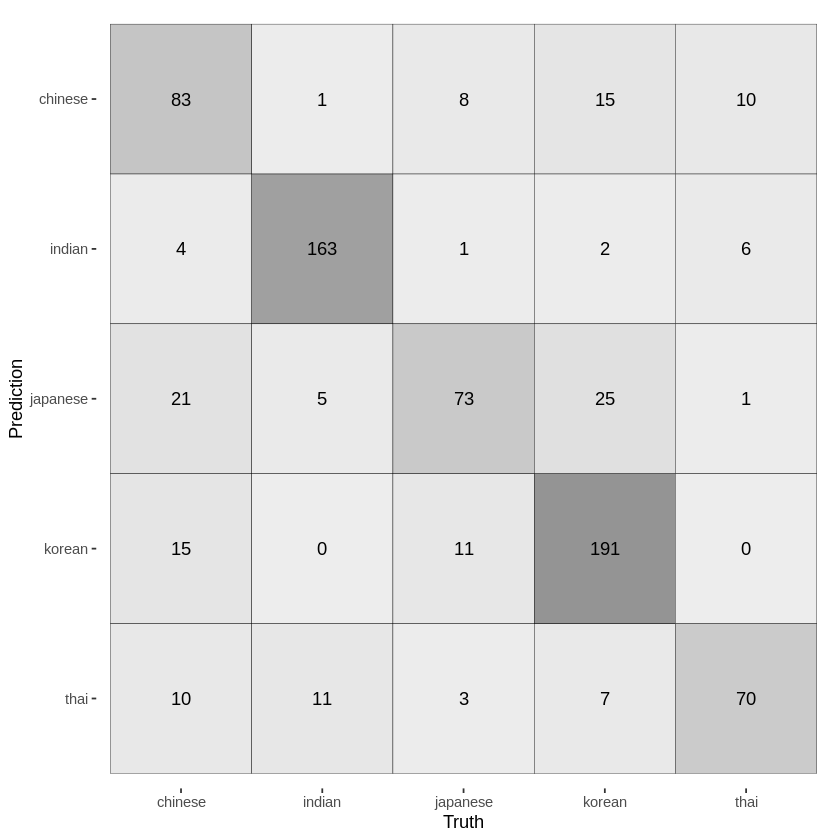

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

कन्फ्यूजन मैट्रिक्स प्लॉट में गहरे रंग के वर्ग अधिक मामलों की संख्या को दर्शाते हैं, और आप उम्मीद कर सकते हैं कि गहरे वर्गों की एक तिरछी रेखा दिखाई देगी, जो उन मामलों को दर्शाती है जहां भविष्यवाणी और वास्तविक लेबल समान हैं।

अब आइए कन्फ्यूजन मैट्रिक्स के लिए सारांश सांख्यिकी की गणना करें।


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7880435
kap,multiclass,0.7276583
sens,macro,0.7780927
spec,macro,0.9477598
ppv,macro,0.7585583
npv,macro,0.9460080
mcc,multiclass,0.7292724
j_index,macro,0.7258524
bal_accuracy,macro,0.8629262


अगर हम कुछ मेट्रिक्स जैसे सटीकता, संवेदनशीलता, और ppv पर ध्यान दें, तो शुरुआत के लिए हम बुरी स्थिति में नहीं हैं 🥳!

## 4. गहराई में जाना

आइए एक सूक्ष्म सवाल पूछें: किसी दिए गए प्रकार के व्यंजन को भविष्यवाणी के परिणाम के रूप में चुनने के लिए कौन से मानदंड का उपयोग किया जाता है?

दरअसल, सांख्यिकीय मशीन लर्निंग एल्गोरिदम, जैसे लॉजिस्टिक रिग्रेशन, `संभावना` पर आधारित होते हैं; तो जो वास्तव में एक क्लासिफायर द्वारा भविष्यवाणी की जाती है, वह संभावित परिणामों के एक सेट पर एक संभावना वितरण होता है। फिर उस वर्ग को चुना जाता है जिसकी संभावना सबसे अधिक होती है, और उसे दिए गए अवलोकनों के लिए सबसे संभावित परिणाम माना जाता है।

आइए इसे क्रियान्वित होते हुए देखें, जहां हम कठोर वर्ग भविष्यवाणियां और संभावनाएं दोनों बनाएंगे।


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine,.pred_class,.pred_chinese,.pred_indian,.pred_japanese,.pred_korean,.pred_thai
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,thai,1.551259e-03,0.4587877,5.988039e-04,2.428503e-04,5.388194e-01
indian,indian,2.637133e-05,0.9999488,6.648651e-07,2.259993e-05,1.577948e-06
indian,indian,1.049433e-03,0.9909982,1.060937e-03,1.644947e-05,6.874989e-03
indian,indian,6.237482e-02,0.4763035,9.136702e-02,3.660913e-01,3.863391e-03
indian,indian,1.431745e-02,0.9418551,2.945239e-02,8.721782e-03,5.653283e-03


बहुत अच्छा!

✅ क्या आप समझा सकते हैं कि मॉडल को पहले अवलोकन को थाई मानने में इतना विश्वास क्यों है?

## **🚀चुनौती**

इस पाठ में, आपने अपने साफ किए गए डेटा का उपयोग करके एक मशीन लर्निंग मॉडल बनाया जो सामग्री की एक श्रृंखला के आधार पर राष्ट्रीय व्यंजन की भविष्यवाणी कर सकता है। कुछ समय निकालें और [कई विकल्पों](https://www.tidymodels.org/find/parsnip/#models) को पढ़ें जो Tidymodels डेटा को वर्गीकृत करने के लिए प्रदान करता है और [अन्य तरीके](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) बहुविकल्पीय प्रतिगमन फिट करने के लिए।

#### धन्यवाद:

[`एलिसन हॉर्स्ट`](https://twitter.com/allison_horst/) को अद्भुत चित्रण बनाने के लिए जो R को अधिक स्वागतयोग्य और आकर्षक बनाते हैं। उनके [गैलरी](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) में और चित्रण खोजें।

[Cassie Breviu](https://www.twitter.com/cassieview) और [Jen Looper](https://www.twitter.com/jenlooper) को इस मॉड्यूल का मूल Python संस्करण बनाने के लिए ♥️

<br>
कुछ चुटकुले डालने की कोशिश करता, लेकिन मुझे फूड पन्स समझ नहीं आते 😅।

<br>

खुशहाल सीखना,

[Eric](https://twitter.com/ericntay), गोल्ड Microsoft Learn स्टूडेंट एंबेसडर।



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता के लिए प्रयासरत हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को आधिकारिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम उत्तरदायी नहीं हैं।  
